In [1]:
import pandas as pd
import re
import ast
from ast import literal_eval
import statistics

# Silence the warning
pd.options.mode.chained_assignment = None

In [2]:
# Silence the warning
pd.options.mode.chained_assignment = None

#### Import Higg dataset

In [3]:
#import new Higg material data
df = pd.read_csv('higg_msi_scored_manual.csv')

In [4]:
#Data Ranking 
types = df['type'].unique()
s_globwarm = []
s_eutroph = []
s_water = []
s_resdep = []
s_chem = []
s_overall = []

for t in types:
    sg = ((1-df['globalwarming'].loc[df['type'] == t].rank(pct=True)) *4.0)+1
    s_globwarm.append(sg)
    se = ((1-df['eutrophication'].loc[df['type'] == t].rank(pct=True)) *4.0)+1
    s_eutroph.append(se)
    sw = ((1-df['waterscarcity'].loc[df['type'] == t].rank(pct=True)) *4.0)+1
    s_water.append(sw)
    sr = ((1-df['abioticresourcedepletion'].loc[df['type'] == t].rank(pct=True)) *4.0)+1
    s_resdep.append(sr)
    sc = ((1-df['chemistry'].loc[df['type'] == t].rank(pct=True)) *4.0)+1
    s_chem.append(sc)
    so = (sg+se+sw+sr+sc)/5
    s_overall.append(so)

In [5]:
#Outlier Analysis before Normalisation
from scipy import stats

outliers_gw=[]
outliers_e=[]
outliers_ws=[]
outliers_ard=[]

for t in types:
    
    #outlier taken out using z-scores
    z_gw = stats.zscore(df['globalwarming'].loc[df['type'] == t])
    z_e = stats.zscore(df['eutrophication'].loc[df['type'] == t])
    z_ws = stats.zscore(df['waterscarcity'].loc[df['type'] == t])
    z_ard = stats.zscore(df['abioticresourcedepletion'].loc[df['type'] == t])
    
    o_gw =[]
    o_e =[]
    o_ws =[]
    o_ard =[]
    

    for i in range(len(z_gw)):
        if abs(z_gw[i])>2:
            o_gw.append(i)
        if abs(z_e[i])>2:
            o_e.append(i)
        if abs(z_ws[i])>2:
            o_ws.append(i)
        if abs(z_ard[i])>2:
            o_ard.append(i)


         
    outliers_gw.append(o_gw)
    outliers_e.append(o_e)
    outliers_ws.append(o_ws)
    outliers_ard.append(o_ard)
            

/Users/Jeremy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [6]:
outliers_gw2=[]
outliers_e2=[]
outliers_ws2=[]
outliers_ard2=[]

j=0

for t in types:
    
    #outlier taken out using z-scores
    z_gw = stats.zscore(df['globalwarming'].loc[df['type'] == t].reset_index().drop(index=outliers_gw[j]).drop('index',axis=1)['globalwarming'])
    z_e = stats.zscore(df['eutrophication'].loc[df['type'] == t].reset_index().drop(index=outliers_e[j]).drop('index',axis=1)['eutrophication'])
    z_ws = stats.zscore(df['waterscarcity'].loc[df['type'] == t].reset_index().drop(index=outliers_ws[j]).drop('index',axis=1)['waterscarcity'])
    z_ard = stats.zscore(df['abioticresourcedepletion'].loc[df['type'] == t].reset_index().drop(index=outliers_ard[j]).drop('index',axis=1)['abioticresourcedepletion'])
    
    o_gw =[]
    o_e =[]
    o_ws =[]
    o_ard =[]
    
    for i in range(len(z_gw)):
        if abs(z_gw[i])>2:
            o_gw.append(i)
    for i in range(len(z_e)):
        if abs(z_e[i])>2:
            o_e.append(i)
    for i in range(len(z_ws)):
        if abs(z_ws[i])>2:
            o_ws.append(i)
    for i in range(len(z_ard)):
        if abs(z_ard[i])>2:
            o_ard.append(i)


         
    outliers_gw2.append(o_gw)
    outliers_e2.append(o_e)
    outliers_ws2.append(o_ws)
    outliers_ard2.append(o_ard)
    j+=1

/Users/Jeremy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [7]:
outliers_gw3=[]
outliers_e3=[]
outliers_ws3=[]
outliers_ard3=[]

j=0

for t in types:
    
    #outlier taken out using z-scores
    z_gw = stats.zscore(df['globalwarming'].loc[df['type'] == t].reset_index().drop(index=outliers_gw[j]).drop('index',axis=1).reset_index().drop(index=outliers_gw2[j]).drop('index',axis=1)['globalwarming'])
    z_e = stats.zscore(df['eutrophication'].loc[df['type'] == t].reset_index().drop(index=outliers_e[j]).drop('index',axis=1).reset_index().drop(index=outliers_e2[j]).drop('index',axis=1)['eutrophication'])
    z_ws = stats.zscore(df['waterscarcity'].loc[df['type'] == t].reset_index().drop(index=outliers_ws[j]).drop('index',axis=1).reset_index().drop(index=outliers_ws2[j]).drop('index',axis=1)['waterscarcity'])
    z_ard = stats.zscore(df['abioticresourcedepletion'].loc[df['type'] == t].reset_index().drop(index=outliers_ard[j]).drop('index',axis=1).reset_index().drop(index=outliers_ard2[j]).drop('index',axis=1)['abioticresourcedepletion'])
    
    o_gw =[]
    o_e =[]
    o_ws =[]
    o_ard =[]

    for i in range(len(z_gw)):
        if abs(z_gw[i])>2:
            o_gw.append(i)
    for i in range(len(z_e)):
        if abs(z_e[i])>2:
            o_e.append(i)
    for i in range(len(z_ws)):
        if abs(z_ws[i])>2:
            o_ws.append(i)
    for i in range(len(z_ard)):
        if abs(z_ard[i])>2:
            o_ard.append(i)

         
    outliers_gw3.append(o_gw)
    outliers_e3.append(o_e)
    outliers_ws3.append(o_ws)
    outliers_ard3.append(o_ard)
    j+=1

/Users/Jeremy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [8]:
#Data Normalization
types = df['type'].unique()
s_globwarm = []
s_eutroph = []
s_water = []
s_resdep = []
s_chem = []
s_overall = []


#initialisation
j=0

for t in types:    
    #print(t)

    globalwarm = df['globalwarming'].loc[df['type'] == t].reset_index().drop(index=outliers_gw[j]).drop('index',axis=1).reset_index().drop(index=outliers_gw2[j]).drop('index',axis=1).reset_index().drop(index=outliers_gw3[j]).drop('index',axis=1)


    eutroph = df['eutrophication'].loc[df['type'] == t].reset_index().drop(index=outliers_e[j]).drop('index',axis=1).reset_index().drop(index=outliers_e2[j]).drop('index',axis=1).reset_index().drop(index=outliers_e3[j]).drop('index',axis=1)


    waterscar = df['waterscarcity'].loc[df['type'] == t].reset_index().drop(index=outliers_ws[j]).drop('index',axis=1).reset_index().drop(index=outliers_ws2[j]).drop('index',axis=1).reset_index().drop(index=outliers_ws3[j]).drop('index',axis=1)
    
    
    abioticresource = df['abioticresourcedepletion'].loc[df['type'] == t].reset_index().drop(index=outliers_ard[j]).drop('index',axis=1).reset_index().drop(index=outliers_ard2[j]).drop('index',axis=1).reset_index().drop(index=outliers_ard3[j]).drop('index',axis=1)
    
    
    #normalization
    min_gw = globalwarm.min()
    max_gw = globalwarm.max()
    min_e = eutroph.min()
    max_e = eutroph.max()
    min_ws = waterscar.min()
    max_ws = waterscar.max()
    min_ard = abioticresource.min()
    max_ard = abioticresource.max()
    
    
    for i in range(len(df['globalwarming'].loc[df['type'] == t])):
        s_globwarm.append(float((df['globalwarming'].loc[df['type'] == t].iloc[i]-min_gw)/(max_gw-min_gw)))
        s_eutroph.append(float((df['eutrophication'].loc[df['type'] == t].iloc[i]-min_e)/(max_e-min_e)))
        s_water.append(float((df['waterscarcity'].loc[df['type'] == t].iloc[i]-min_ws)/(max_ws-min_ws)))
        s_resdep.append(float((df['abioticresourcedepletion'].loc[df['type'] == t].iloc[i]-min_ard)/(max_ard-min_ard)))
    j+=1
    

In [9]:
df['score_globwarm'] = s_globwarm
df['score_eutrophication'] = s_eutroph
df['score_water'] = s_water
df['score_resourcedepletion'] = s_resdep

In [10]:
def scaletofive(x):

    if x > 1:
        x = 1
    elif x < 0:
        x = 5
    else:
        x = (1-x)*4+1
    return x

In [11]:
def scaletofive_water(x):

    if x > 1:
        x = 1
    elif x < 0:
        x = 5
    else:
        x = (1-x)*3+1
    return x

In [12]:
def scaletofive_gm(x):

    if x > 1:
        x = 1
    elif x < 0:
        x = 5
    else:
        x = (1-x)*3.5+1
    return x

In [13]:
df['score_globwarm'] = df['score_globwarm'].apply(scaletofive_gm)
df['score_eutrophication'] = df['score_eutrophication'].apply(scaletofive_gm)
df['score_water'] = df['score_water'].apply(scaletofive_water)
df['score_resourcedepletion'] = df['score_resourcedepletion'].apply(scaletofive)

In [14]:
#export data
df.to_csv('higg_rescaled.csv', index=False)

#### Visual Representation of the data

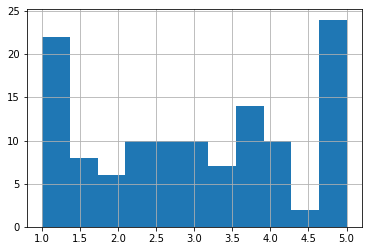

In [63]:
df['score_resourcedepletion'].hist(bins=11)

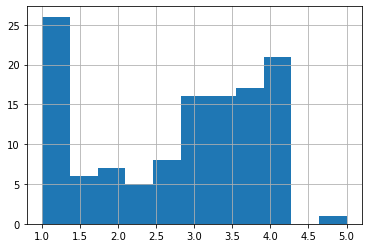

In [64]:
df['score_water'].hist(bins=11)

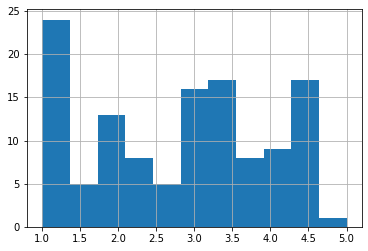

In [65]:
df['score_globwarm'].hist(bins=11)

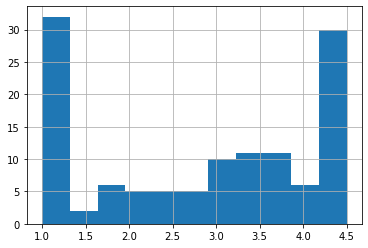

In [66]:
df['score_eutrophication'].hist(bins=11)

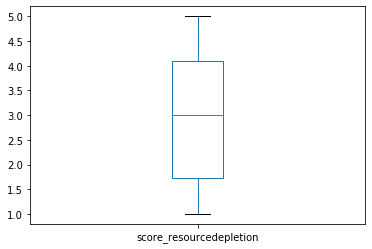

In [48]:
df['score_resourcedepletion'].plot.box()

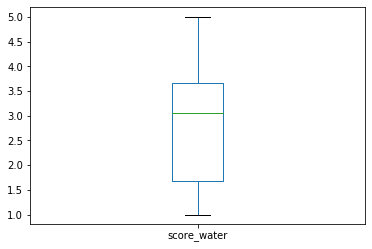

In [49]:
df['score_water'].plot.box()

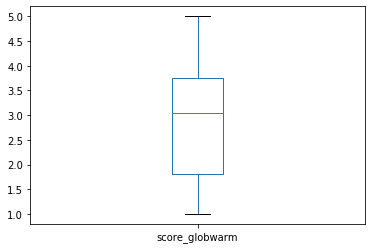

In [50]:
df['score_globwarm'].plot.box()

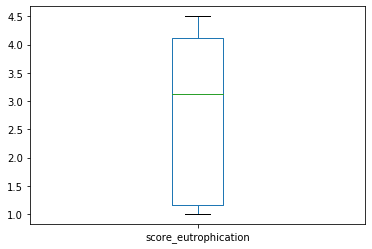

In [51]:
df['score_eutrophication'].plot.box()

### Appendix

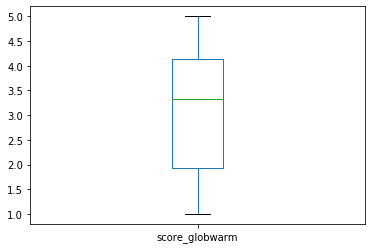

In [22]:
#old boxplot for referrence
df['score_globwarm'].plot.box()

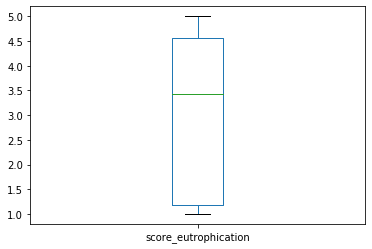

In [23]:
#old boxplot for referrence
df['score_eutrophication'].plot.box()